<a href="https://colab.research.google.com/github/imaanwaziri/Formula_1_project/blob/main/F1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import files
from google.colab import files
uploaded = files.upload()

In [ ]:
#import libraries
import numpy as np
from collections import Counter

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_constructors = pd.read_csv ("constructors.csv")
df_constructors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#code to link google drive with google colab

Mounted at /content/drive


In [ ]:
#read csv file
df_constuctors = pd.read_csv('/content/drive/MyDrive/F1_Project_Data/archive/constructors.csv')

In [ ]:
#removing url from constructors table
df_new_con = df_constuctors.drop(['url'], axis=1)
df_new_con

,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian
...,...,...,...,...
206,209,manor,Manor Marussia,British
207,210,haas,Haas F1 Team,American
208,211,racing_point,Racing Point,British
209,213,alphatauri,AlphaTauri,Italian


In [ ]:
df_new_con.to_csv('/content/drive/MyDrive/F1_Project_Data/archive/df_new_con.csv', index=False)
#exporting the file to google drive as a csv file

In [ ]:
df_con_stan = pd.read_csv('/content/drive/MyDrive/F1_Project_Data/archive/constructor_standings.csv')

In [ ]:
df_con_stan.to_csv('/content/drive/MyDrive/F1_Project_Data/archive/df_con_stan.csv', index=False)

In [ ]:
con_stan_merged = pd.merge(df_con_stan, df_new_con, on='constructorId', how='left')

In [ ]:
con_stan_merged['race_con_id'] = (con_stan_merged['raceId']).astype(str) + "-" + (con_stan_merged['constructorId']).astype(str)

In [ ]:
con_stan_merged

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name,nationality,race_con_id
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,18-1
1,2,18,2,8.0,3,3,0,bmw_sauber,BMW Sauber,German,18-2
2,3,18,3,9.0,2,2,0,williams,Williams,British,18-3
3,4,18,4,5.0,4,4,0,renault,Renault,French,18-4
4,5,18,5,2.0,5,5,0,toro_rosso,Toro Rosso,Italian,18-5
...,...,...,...,...,...,...,...,...,...,...,...
13046,28568,1110,214,57.0,6,6,0,alpine,Alpine F1 Team,French,1110-214
13047,28569,1110,3,11.0,7,7,0,williams,Williams,British,1110-3
13048,28570,1110,213,3.0,10,10,0,alphatauri,AlphaTauri,Italian,1110-213
13049,28571,1110,210,11.0,8,8,0,haas,Haas F1 Team,American,1110-210


In [ ]:
#checking for null values
con_stan_merged.isnull().sum()

constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
constructorRef            0
name                      0
nationality               0
race_con_id               0
dtype: int64

In [ ]:
con_stan_merged.to_csv('/content/drive/MyDrive/F1_Project_Data/archive/con_stan_merged.csv', index=False)

In [ ]:
con_stan_merged.duplicated().sum()

0

In [ ]:
#aggregating wins and points per driver
agg_con_stan_merged = con_stan_merged.groupby(['raceId']).agg({'points' : sum, 'wins': sum}).reset_index()

In [ ]:
agg_con_stan_merged

,raceId,points,wins
0,1,39.0,1
1,2,58.5,2
2,3,97.5,3
3,4,136.5,4
4,5,175.5,5
...,...,...,...
1022,1106,851.0,8
1023,1107,989.0,9
1024,1108,1091.0,10
1025,1109,1193.0,11


In [ ]:
df_clean_results = pd.read_csv('/content/drive/MyDrive/F1_Project_Data/df_clean_results.csv')

In [ ]:
#merging race results and constructors standings by left join
pd.merge(agg_con_stan_merged, df_clean_results, on= 'raceId', how='left' )

,raceId,points_x,wins,resultId,driverId,constructorId,number,positionText,positionOrder,points_y,time,milliseconds,fastestLapTime,fastestLapSpeed,statusId
0,1,39.0,1,7554,18,23,22,1,1,10.0,1:34:15.784,5655784,1:28.020,216.891,1
1,1,39.0,1,7555,22,23,23,2,2,8.0,+0.807,5656591,1:29.066,214.344,1
2,1,39.0,1,7556,15,7,9,3,3,6.0,+1.604,5657388,1:28.916,214.706,1
3,1,39.0,1,7557,10,7,10,4,4,5.0,+4.435,5660219,1:28.416,215.920,1
4,1,39.0,1,7558,4,4,7,5,5,4.0,+4.879,5660663,1:28.712,215.199,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24504,1110,1331.0,12,26081,817,213,3,16,16,0.0,+1:43.071,5053521,1:50.994,227.169,1
24505,1110,1331.0,12,26082,858,3,2,17,17,0.0,+1:44.476,5054926,1:50.486,228.213,1
24506,1110,1331.0,12,26083,807,210,27,18,18,0.0,+1:50.450,5060900,1:49.907,229.415,1
24507,1110,1331.0,12,26084,832,6,55,R,19,0.0,\N,\N,1:53.138,222.864,130


In [ ]:
df_clean_results

,resultId,raceId,driverId,constructorId,number,positionText,positionOrder,points,time,milliseconds,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,10.0,1:34:50.616,5690616,1:27.452,218.300,1
1,2,18,2,2,3,2,2,8.0,+5.478,5696094,1:27.739,217.586,1
2,3,18,3,3,7,3,3,6.0,+8.163,5698779,1:28.090,216.719,1
3,4,18,4,4,5,4,4,5.0,+17.181,5707797,1:28.603,215.464,1
4,5,18,5,1,23,5,5,4.0,+18.014,5708630,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,16,16,0.0,+1:43.071,5053521,1:50.994,227.169,1
26076,26082,1110,858,3,2,17,17,0.0,+1:44.476,5054926,1:50.486,228.213,1
26077,26083,1110,807,210,27,18,18,0.0,+1:50.450,5060900,1:49.907,229.415,1
26078,26084,1110,832,6,55,R,19,0.0,\N,\N,1:53.138,222.864,130


In [ ]:
df_clean_results['race_con_id'] = (df_clean_results['raceId']).astype(str) + "-" + (df_clean_results['constructorId']).astype(str)

In [ ]:
df_clean_results

,resultId,raceId,driverId,constructorId,number,positionText,positionOrder,points,time,milliseconds,fastestLapTime,fastestLapSpeed,statusId,race_con_id
0,1,18,1,1,22,1,1,10.0,1:34:50.616,5690616,1:27.452,218.300,1,18-1
1,2,18,2,2,3,2,2,8.0,+5.478,5696094,1:27.739,217.586,1,18-2
2,3,18,3,3,7,3,3,6.0,+8.163,5698779,1:28.090,216.719,1,18-3
3,4,18,4,4,5,4,4,5.0,+17.181,5707797,1:28.603,215.464,1,18-4
4,5,18,5,1,23,5,5,4.0,+18.014,5708630,1:27.418,218.385,1,18-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,16,16,0.0,+1:43.071,5053521,1:50.994,227.169,1,1110-213
26076,26082,1110,858,3,2,17,17,0.0,+1:44.476,5054926,1:50.486,228.213,1,1110-3
26077,26083,1110,807,210,27,18,18,0.0,+1:50.450,5060900,1:49.907,229.415,1,1110-210
26078,26084,1110,832,6,55,R,19,0.0,\N,\N,1:53.138,222.864,130,1110-6


In [ ]:
df_clean_results.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
positionText       0
positionOrder      0
points             0
time               0
milliseconds       0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
race_con_id        0
dtype: int64

In [ ]:
con_stan_merged

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name,nationality,race_con_id
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,18-1
1,2,18,2,8.0,3,3,0,bmw_sauber,BMW Sauber,German,18-2
2,3,18,3,9.0,2,2,0,williams,Williams,British,18-3
3,4,18,4,5.0,4,4,0,renault,Renault,French,18-4
4,5,18,5,2.0,5,5,0,toro_rosso,Toro Rosso,Italian,18-5
...,...,...,...,...,...,...,...,...,...,...,...
13046,28568,1110,214,57.0,6,6,0,alpine,Alpine F1 Team,French,1110-214
13047,28569,1110,3,11.0,7,7,0,williams,Williams,British,1110-3
13048,28570,1110,213,3.0,10,10,0,alphatauri,AlphaTauri,Italian,1110-213
13049,28571,1110,210,11.0,8,8,0,haas,Haas F1 Team,American,1110-210


In [ ]:
final_con_merged = pd.merge(df_clean_results, con_stan_merged[['position','wins','constructorRef','name','nationality','race_con_id']], on= 'race_con_id', how ='left')
#selecting the specific columns from con_stan_merged

In [ ]:
final_con_merged #final constructor + cleaned_results table merged

,resultId,raceId,driverId,constructorId,number,positionText,positionOrder,points,time,milliseconds,fastestLapTime,fastestLapSpeed,statusId,race_con_id,position,wins,constructorRef,name,nationality
0,1,18,1,1,22,1,1,10.0,1:34:50.616,5690616,1:27.452,218.300,1,18-1,1.0,1.0,mclaren,McLaren,British
1,2,18,2,2,3,2,2,8.0,+5.478,5696094,1:27.739,217.586,1,18-2,3.0,0.0,bmw_sauber,BMW Sauber,German
2,3,18,3,3,7,3,3,6.0,+8.163,5698779,1:28.090,216.719,1,18-3,2.0,0.0,williams,Williams,British
3,4,18,4,4,5,4,4,5.0,+17.181,5707797,1:28.603,215.464,1,18-4,4.0,0.0,renault,Renault,French
4,5,18,5,1,23,5,5,4.0,+18.014,5708630,1:27.418,218.385,1,18-1,1.0,1.0,mclaren,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,16,16,0.0,+1:43.071,5053521,1:50.994,227.169,1,1110-213,10.0,0.0,alphatauri,AlphaTauri,Italian
26076,26082,1110,858,3,2,17,17,0.0,+1:44.476,5054926,1:50.486,228.213,1,1110-3,7.0,0.0,williams,Williams,British
26077,26083,1110,807,210,27,18,18,0.0,+1:50.450,5060900,1:49.907,229.415,1,1110-210,8.0,0.0,haas,Haas F1 Team,American
26078,26084,1110,832,6,55,R,19,0.0,\N,\N,1:53.138,222.864,130,1110-6,4.0,0.0,ferrari,Ferrari,Italian


In [ ]:
final_con_merged.isnull().sum()

resultId              0
raceId                0
driverId              0
constructorId         0
number                0
positionText          0
positionOrder         0
points                0
time                  0
milliseconds          0
fastestLapTime        0
fastestLapSpeed       0
statusId              0
race_con_id           0
position           1867
wins               1867
constructorRef     1867
name               1867
nationality        1867
dtype: int64

In [ ]:
#replacing null values with 0
final_con_merged['position'] = final_con_merged['position'].fillna(0)

In [ ]:
final_con_merged['wins'] = final_con_merged['wins'].fillna(0)

In [ ]:
final_con_merged['constructorRef'] = final_con_merged['constructorRef'].fillna("NA")

In [ ]:
final_con_merged['name'] = final_con_merged['name'].fillna("NA")

In [ ]:
final_con_merged['nationality'] = final_con_merged['nationality'].fillna("NA")

In [ ]:
final_con_merged.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
positionText       0
positionOrder      0
points             0
time               0
milliseconds       0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
race_con_id        0
position           0
wins               0
constructorRef     0
name               0
nationality        0
dtype: int64

In [ ]:
#exporting the table to BigQuery
project_id = 'f1-project-406412'
dataset = 'F1_Clean_Merge'
final_con_merged.to_gbq(f'{dataset}.final_con_merged', project_id=project_id)

TableCreationError: ignored

In [ ]:
final_con_merged.to_csv('/content/drive/MyDrive/F1_Project_Data/archive/final_con_merged.csv', index=False)

In [ ]:
#importing a table from Google Big Query
from google.colab import auth
auth.authenticate_user()
project_id = "f1-project-406412"
dataset = "F1_Clean_Merge"
merged_results = "merged_results"
query1 = f"SELECT * FROM `{project_id}.{dataset}.{merged_results}`"
df_merged_results = pd.read_gbq(query1, project_id=project_id)


In [ ]:
df_merged_results

,resultId,raceId,driverId,constructorId,positionText,positionOrder,points,time,milliseconds,fastestLapTime,fastestLapSpeed,statusId,status,dob,nationality,name_x,year,circuitId,name_y,date
0,25850,1098,1,131,5,5,10,+50.977,5687713,1:36.546,201.802,1,Finished,1985-01-07,British,Lewis Hamilton,2023,3,Bahrain Grand Prix,2023-03-05
1,25848,1098,4,117,3,3,15,+38.637,5675373,1:36.156,202.62,1,Finished,1981-07-29,Spanish,Fernando Alonso,2023,3,Bahrain Grand Prix,2023-03-05
2,25860,1098,807,210,15,15,0,\N,\N,1:36.616,201.656,11,+1 Lap,1987-08-19,German,Nico Hülkenberg,2023,3,Bahrain Grand Prix,2023-03-05
3,25847,1098,815,9,2,2,18,+11.987,5648723,1:36.344,202.225,1,Finished,1990-01-26,Mexican,Sergio Pérez,2023,3,Bahrain Grand Prix,2023-03-05
4,25853,1098,822,51,8,8,4,+1:12.647,5709383,1:37.379,200.075,1,Finished,1989-08-28,Finnish,Valtteri Bottas,2023,3,Bahrain Grand Prix,2023-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,20119,837,786,51,2,2,6,+14.0,10060000,\N,\N,1,Finished,1898-06-09,Italian,Luigi Fagioli,1950,13,Belgian Grand Prix,1950-06-18
26076,20128,837,774,154,R,11,0,\N,\N,\N,\N,108,Oil pipe,1907-04-12,French,Eugène Chaboud,1950,13,Belgian Grand Prix,1950-06-18
26077,20127,837,780,105,10,10,0,\N,\N,\N,\N,16,+6 Laps,1916-09-15,Swiss,Toni Branca,1950,13,Belgian Grand Prix,1950-06-18
26078,20126,837,785,126,9,9,0,\N,\N,\N,\N,15,+5 Laps,1921-05-11,British,Geoff Crossley,1950,13,Belgian Grand Prix,1950-06-18


In [ ]:
df_merged_results = df_merged_results[df_merged_results['year'] < 2023]

In [ ]:
df_merged_results

,resultId,raceId,driverId,constructorId,positionText,positionOrder,points,time,milliseconds,fastestLapTime,fastestLapSpeed,statusId,status,dob,nationality,name_x,year,circuitId,name_y,date
240,25408,1074,1,131,3,3,15,+9.675,5863259,1:36.228,202.469,1,Finished,1985-01-07,British,Lewis Hamilton,2022,3,Bahrain Grand Prix,2022-03-20
241,25414,1074,4,214,9,9,2,+22.390,5875974,1:36.733,201.412,1,Finished,1981-07-29,Spanish,Fernando Alonso,2022,3,Bahrain Grand Prix,2022-03-20
242,25422,1074,807,117,17,17,0,+1:03.829,5917413,1:38.201,198.401,1,Finished,1987-08-19,German,Nico Hülkenberg,2022,3,Bahrain Grand Prix,2022-03-20
243,25423,1074,815,9,18,18,0,\N,\N,1:36.089,202.762,32,Fuel pressure,1990-01-26,Mexican,Sergio Pérez,2022,3,Bahrain Grand Prix,2022-03-20
244,25419,1074,817,1,14,14,0,+54.975,5908559,1:37.261,200.318,1,Finished,1989-07-01,Australian,Daniel Ricciardo,2022,3,Bahrain Grand Prix,2022-03-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,20119,837,786,51,2,2,6,+14.0,10060000,\N,\N,1,Finished,1898-06-09,Italian,Luigi Fagioli,1950,13,Belgian Grand Prix,1950-06-18
26076,20128,837,774,154,R,11,0,\N,\N,\N,\N,108,Oil pipe,1907-04-12,French,Eugène Chaboud,1950,13,Belgian Grand Prix,1950-06-18
26077,20127,837,780,105,10,10,0,\N,\N,\N,\N,16,+6 Laps,1916-09-15,Swiss,Toni Branca,1950,13,Belgian Grand Prix,1950-06-18
26078,20126,837,785,126,9,9,0,\N,\N,\N,\N,15,+5 Laps,1921-05-11,British,Geoff Crossley,1950,13,Belgian Grand Prix,1950-06-18


In [ ]:
df_merged_results = df_merged_results[df_merged_results['name_y'] != "Indianapolis 500" ]

In [ ]:
df_merged_results

,resultId,raceId,driverId,constructorId,positionText,positionOrder,points,time,milliseconds,fastestLapTime,fastestLapSpeed,statusId,status,dob,nationality,name_x,year,circuitId,name_y,date
240,25408,1074,1,131,3,3,15,+9.675,5863259,1:36.228,202.469,1,Finished,1985-01-07,British,Lewis Hamilton,2022,3,Bahrain Grand Prix,2022-03-20
241,25414,1074,4,214,9,9,2,+22.390,5875974,1:36.733,201.412,1,Finished,1981-07-29,Spanish,Fernando Alonso,2022,3,Bahrain Grand Prix,2022-03-20
242,25422,1074,807,117,17,17,0,+1:03.829,5917413,1:38.201,198.401,1,Finished,1987-08-19,German,Nico Hülkenberg,2022,3,Bahrain Grand Prix,2022-03-20
243,25423,1074,815,9,18,18,0,\N,\N,1:36.089,202.762,32,Fuel pressure,1990-01-26,Mexican,Sergio Pérez,2022,3,Bahrain Grand Prix,2022-03-20
244,25419,1074,817,1,14,14,0,+54.975,5908559,1:37.261,200.318,1,Finished,1989-07-01,Australian,Daniel Ricciardo,2022,3,Bahrain Grand Prix,2022-03-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,20119,837,786,51,2,2,6,+14.0,10060000,\N,\N,1,Finished,1898-06-09,Italian,Luigi Fagioli,1950,13,Belgian Grand Prix,1950-06-18
26076,20128,837,774,154,R,11,0,\N,\N,\N,\N,108,Oil pipe,1907-04-12,French,Eugène Chaboud,1950,13,Belgian Grand Prix,1950-06-18
26077,20127,837,780,105,10,10,0,\N,\N,\N,\N,16,+6 Laps,1916-09-15,Swiss,Toni Branca,1950,13,Belgian Grand Prix,1950-06-18
26078,20126,837,785,126,9,9,0,\N,\N,\N,\N,15,+5 Laps,1921-05-11,British,Geoff Crossley,1950,13,Belgian Grand Prix,1950-06-18


In [ ]:
project_id = 'f1-project-406412'
dataset = 'F1_Clean_Merge'
df_merged_results.to_gbq(f'{dataset}.df_merged_results', project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 721.66it/s]


In [ ]:
con_win_results = df_merged_results.groupby('constructorId').agg(total_points_con=('points', 'sum'),num_races_con=('raceId', 'count')).reset_index()

In [ ]:
from google.colab import auth
auth.authenticate_user()
project_id = "f1-project-406412"
dataset = "F1_Clean_Merge"
drivers_win_count = "drivers_win_count"
query1 = f"SELECT * FROM `{project_id}.{dataset}.{drivers_win_count}`"
df_drivers_win_count = pd.read_gbq(query1, project_id=project_id)

In [ ]:
df_drivers_win_count

,driverId,name_x,num_races,points
0,9,Robert Kubica,1,10
1,5,Heikki Kovalainen,1,10
2,813,Pastor Maldonado,1,25
3,842,Pierre Gasly,1,25
4,839,Esteban Ocon,1,25
...,...,...,...,...
108,830,Max Verstappen,45,1126
109,117,Alain Prost,51,461
110,20,Sebastian Vettel,53,1250
111,30,Michael Schumacher,91,910


In [ ]:
#Using a GroupBy to get the total number of races and points against driverID
columns_to_group = ['driverId', 'name_x']
df_win_count= df_drivers_win_count.groupby(columns_to_group, as_index=False).sum()


In [ ]:
df_win_count.sort_values(ascending = False, by='points')

,driverId,name_x,num_races,points
0,1,Lewis Hamilton,103,2444
11,20,Sebastian Vettel,53,1250
107,830,Max Verstappen,45,1126
15,30,Michael Schumacher,91,910
1,3,Nico Rosberg,23,575
...,...,...,...,...
95,611,Sam Hanks,1,8
102,786,Luigi Fagioli,1,4
43,200,Jochen Mass,1,4
52,230,Vittorio Brambilla,1,4


In [ ]:
# df_win_count.set_index('driverId', inplace = True)

In [ ]:
df_win_count

,driverId,name_x,num_races,points
0,1,Lewis Hamilton,103,2444
1,3,Nico Rosberg,23,575
2,4,Fernando Alonso,32,485
3,5,Heikki Kovalainen,1,10
4,8,Kimi Räikkönen,21,255
...,...,...,...,...
108,832,Carlos Sainz,1,25
109,839,Esteban Ocon,1,25
110,842,Pierre Gasly,1,25
111,844,Charles Leclerc,5,127


In [ ]:
points = {1:25, 2:18,3:15,4:12,5:10,6:8,7:6,8:4,9:2,10:1}
points

{1: 25, 2: 18, 3: 15, 4: 12, 5: 10, 6: 8, 7: 6, 8: 4, 9: 2, 10: 1}

In [ ]:
df_merged_results.sort_values(by='raceId', inplace=True)

<ipython-input-52-9294c09335c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_results.sort_values(by='raceId', inplace=True)


In [ ]:
df_merged_results[['raceId']].groupby(by='raceId', as_index=False).size().sort_values(by='size')

,raceId,size
762,765,10
816,827,13
659,660,13
469,470,14
825,837,14
...,...,...
361,362,39
358,359,39
356,357,39
365,366,39


In [ ]:
df_driver_result = df_merged_results[df_merged_results.driverId==1]
df_driver_result.reset_index(drop=True, inplace=True)
df_driver_result.loc[1, 'positionOrder']

7

In [ ]:
#FUNCTION TO CALCULATE THE ELO RATING IN F1 RACE
def calculate_elo(r_old, s, e, k=25):

  #parameters + Variable definition
  #r_old - ELO rating of driver in the previous race
  # s - actual position
  # e - expectant position based on the driver's previous race win
  #k: Constant (maximum points for win i.e. 25)
  #position - position of the driver in the previous race
  #r_new - New ELO rating



  #Returns:
  #Calculate Elo rating
  #-r_new: Updated Elo rating for player

  points = {1:25, 2:18,3:15,4:12,5:10,6:8,7:6,8:4,9:2,10:1}
  # ,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0

  # for position, values in points.items():
  if s <=10:

    current_points = points[s]

    if e <= 10:
      exp_points = points[e]
    else:
       exp_points = 0


    if s == 1:
      r_new = r_old + k * ((current_points + 14) - exp_points)
    else:
      r_new = r_old + k * (current_points - exp_points)
    return r_new
  else:
    return r_old



In [ ]:
# Example usage:
points = {1:25, 2:18,3:15,4:12,5:10,6:8,7:6,8:4,9:2,10:1}
elo_ratings = {} #Create a dictionary for elo_ratings
total_points = {} #Create a dictionary for total points earned for all the wins
# Calculate new ratings
for driver in df_win_count.driverId: #run through the driverID col
  driver_results_df = df_merged_results[df_merged_results.driverId==driver] #checking if the driver is equal to the driverID and then adding it to the driver_results dataframe
  driver_results_df.reset_index(drop=True, inplace=True)

  for i in range(len(driver_results_df)):
    if i == 0: #if the driver is 1st in position
      r_old = 1500 #assign the constant ELO rating
      elo_ratings[driver] = r_old
      total_points[driver]= points.get(driver_results_df.loc[i, 'positionOrder'], 0) #total points are calculated based on the position
    else:
      elo_ratings[driver] = calculate_elo(r_old=elo_ratings[driver], s=driver_results_df.loc[i, 'positionOrder'], e = driver_results_df.loc[i-1, 'positionOrder']) #invoking the function with the parameters
      total_points[driver]= total_points[driver] + points.get(driver_results_df.loc[i, 'positionOrder'], 0)


In [ ]:
elo_rating_df = pd.DataFrame({'driverId':elo_ratings.keys(), 'elo_rating':elo_ratings.values(), 'total_points':total_points.values()}) #converting the elo_ratings dictionary to a dataframe
elo_rating_df = elo_rating_df.sort_values(ascending = False, by = 'elo_rating') #sorting the dataframe in the descending order by ELO rating
elo_rating_df = elo_rating_df.merge(df_win_count, how='left', on='driverId') #merging the tables
elo_rating_df

,driverId,elo_rating,total_points,name_x,num_races,points
0,30,55000,3891,Michael Schumacher,91,910
1,1,50950,4737,Lewis Hamilton,103,2444
2,117,36550,2486,Alain Prost,51,461
3,20,35150,3287,Sebastian Vettel,53,1250
4,102,28550,1885,Ayrton Senna,41,379
...,...,...,...,...,...,...
100,375,2925,67,Ludovico Scarfiotti,1,9
101,577,2725,188,Luigi Musso,1,4
102,786,2675,112,Luigi Fagioli,1,4
103,449,1525,1,Rodger Ward,1,8


In [ ]:
elo_rating_df.head(10) #finding the Top 10 drivers based on ELO rating

,driverId,elo_rating,total_points,name_x,num_races,points
0,30,55000,3891,Michael Schumacher,91,910
1,1,50950,4737,Lewis Hamilton,103,2444
2,117,36550,2486,Alain Prost,51,461
3,20,35150,3287,Sebastian Vettel,53,1250
4,102,28550,1885,Ayrton Senna,41,379
5,95,27725,1511,Nigel Mansell,31,294
6,137,26250,1692,Nelson Piquet,23,208
7,8,25325,2795,Kimi Räikkönen,21,255
8,4,24750,2902,Fernando Alonso,32,485
9,830,24375,1980,Max Verstappen,45,1126


In [ ]:
project_id = 'f1-project-406412'
dataset = 'F1_Clean_Merge'
elo_rating_df.to_gbq(f'{dataset}.elo_rating_df', project_id=project_id)

TableCreationError: ignored

In [ ]:
df_driver_age = pd.read_csv('/content/drive/MyDrive/F1_Project_Data/archive/drivers_age.csv')

In [ ]:
df_driver_age

,Unnamed: 0,driverId,driver_name,dob,driver_nationality,min_race_date,max_race_date,drivers_age
0,0,1,Lewis Hamilton,1985-01-07,British,2007-03-18,2022-11-20,38
1,1,2,Nick Heidfeld,1977-05-10,German,2000-03-12,2011-07-31,34
2,2,3,Nico Rosberg,1985-06-27,German,2006-03-12,2016-11-27,31
3,3,4,Fernando Alonso,1981-07-29,Spanish,2001-03-04,2022-11-20,41
4,4,5,Heikki Kovalainen,1981-10-19,Finnish,2007-03-18,2013-11-24,32
...,...,...,...,...,...,...,...,...
747,747,852,Yuki Tsunoda,2000-05-11,Japanese,2021-03-28,2022-11-20,23
748,748,853,Nikita Mazepin,1999-03-02,Russian,2021-03-28,2021-12-12,23
749,749,854,Mick Schumacher,1999-03-22,German,2021-03-28,2022-11-20,24
750,750,855,Guanyu Zhou,1999-05-30,Chinese,2022-03-20,2022-11-20,23


In [ ]:
df_age_con = pd.merge(elo_rating_df, df_driver_age[['driverId','driver_nationality','drivers_age']], on= 'driverId', how ='left')

In [ ]:
final_con_merged.head(10)

,resultId,raceId,driverId,constructorId,number,positionText,positionOrder,points,time,milliseconds,fastestLapTime,fastestLapSpeed,statusId,race_con_id,position,wins,constructorRef,name,nationality
0,1,18,1,1,22,1,1,10.0,1:34:50.616,5690616,1:27.452,218.300,1,18-1,1.0,1.0,mclaren,McLaren,British
1,2,18,2,2,3,2,2,8.0,+5.478,5696094,1:27.739,217.586,1,18-2,3.0,0.0,bmw_sauber,BMW Sauber,German
2,3,18,3,3,7,3,3,6.0,+8.163,5698779,1:28.090,216.719,1,18-3,2.0,0.0,williams,Williams,British
3,4,18,4,4,5,4,4,5.0,+17.181,5707797,1:28.603,215.464,1,18-4,4.0,0.0,renault,Renault,French
4,5,18,5,1,23,5,5,4.0,+18.014,5708630,1:27.418,218.385,1,18-1,1.0,1.0,mclaren,McLaren,British
5,6,18,6,3,8,6,6,3.0,\N,\N,1:29.639,212.974,11,18-3,2.0,0.0,williams,Williams,British
6,7,18,7,5,14,7,7,2.0,\N,\N,1:29.534,213.224,5,18-5,5.0,0.0,toro_rosso,Toro Rosso,Italian
7,8,18,8,6,1,8,8,1.0,\N,\N,1:27.903,217.180,5,18-6,6.0,0.0,ferrari,Ferrari,Italian
8,9,18,9,2,4,R,9,0.0,\N,\N,1:28.753,215.100,4,18-2,3.0,0.0,bmw_sauber,BMW Sauber,German
9,10,18,10,7,12,R,10,0.0,\N,\N,1:29.558,213.166,3,18-7,0.0,0.0,NA,NA,NA


In [ ]:
df_winner_analysis = pd.merge(df_age_con, final_con_merged[['driverId','name','milliseconds']], on= 'driverId', how ='left')

In [ ]:
df_winner_analysis

,driverId,elo_rating,total_points,name_x,num_races,points,driver_nationality,drivers_age,name,milliseconds
0,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,5387451
1,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,5484383
2,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,\N
3,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,5466486
4,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,5758765
...,...,...,...,...,...,...,...,...,...,...
13713,526,1500,1,Troy Ruttman,1,8,American,28,NA,\N
13714,526,1500,1,Troy Ruttman,1,8,American,28,NA,13929950
13715,526,1500,1,Troy Ruttman,1,8,American,28,NA,13961880
13716,526,1500,1,Troy Ruttman,1,8,American,28,NA,\N


In [ ]:
df_winner_analysis

,driverId,elo_rating,total_points,name_x,num_races,points,driver_nationality,drivers_age,name,milliseconds
0,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,5387451
1,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,5484383
2,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,\N
3,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,5466486
4,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,5758765
...,...,...,...,...,...,...,...,...,...,...
13713,526,1500,1,Troy Ruttman,1,8,American,28,NA,\N
13714,526,1500,1,Troy Ruttman,1,8,American,28,NA,13929950
13715,526,1500,1,Troy Ruttman,1,8,American,28,NA,13961880
13716,526,1500,1,Troy Ruttman,1,8,American,28,NA,\N


In [ ]:
df_winner_analysis['milliseconds'] = df_winner_analysis['milliseconds'].replace(r'\N','0')

In [ ]:
df_winner_analysis['milliseconds'] = df_winner_analysis['milliseconds'].astype('int64')

In [ ]:
df_winner_analysis.to_csv('/content/drive/MyDrive/F1_Project_Data/archive/df_winner_analysis.csv', index=False)

In [ ]:
project_id = 'f1-project-406412'
dataset = 'F1_Clean_Merge'
df_winner_analysis.to_gbq(f'{dataset}.df_winner_analysis', project_id=project_id)

In [ ]:
df_winner_analysis

,driverId,elo_rating,total_points,name_x,num_races,points,driver_nationality,drivers_age,name,milliseconds
0,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,5387451
1,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,5484383
2,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,0
3,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,5466486
4,30,55000,3891,Michael Schumacher,91,910,German,44,Ferrari,5758765
...,...,...,...,...,...,...,...,...,...,...
13713,526,1500,1,Troy Ruttman,1,8,American,28,NA,0
13714,526,1500,1,Troy Ruttman,1,8,American,28,NA,13929950
13715,526,1500,1,Troy Ruttman,1,8,American,28,NA,13961880
13716,526,1500,1,Troy Ruttman,1,8,American,28,NA,0


In [ ]:
elo_correlation_matrix = elo_rating_df.corr()

<ipython-input-71-393d4a28dede>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  elo_correlation_matrix = elo_rating_df.corr()


In [ ]:
elo_correlation_matrix.to_csv('/content/drive/MyDrive/F1_Project_Data/archive/elo_correlation_matrix.csv', index=False)

In [ ]:
project_id = 'f1-project-406412'
dataset = 'F1_Clean_Merge'
elo_correlation_matrix.to_gbq(f'{dataset}.elo_correlation_matrix', project_id=project_id)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

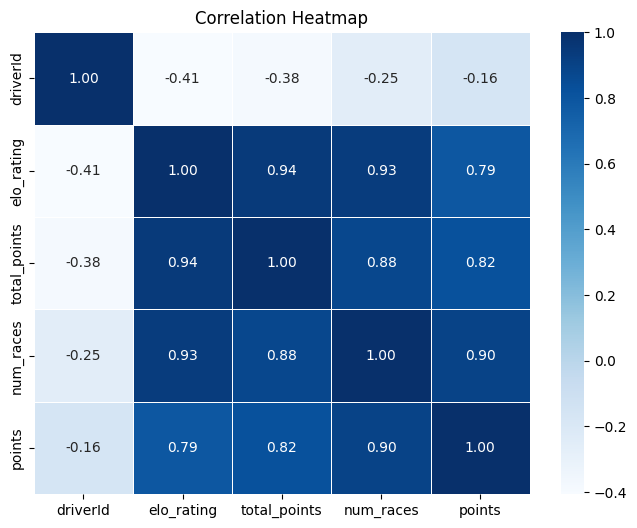

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(elo_correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

plt.savefig("elo_correlation_matrix.jpeg")
#The annot=True adds annotations with correlation values to the cells.
#The cmap='coolwarm' sets the color map for the heatmap.
#The fmt='.2f' formats the annotations to display two decimal places.
#The linewidths=0.5 adds a slight separation between cells.
#Finally, we use plt.show() to display the heatmap

#0.8 to 1.0 (or -0.8 to -1.0): Very strong correlation
#0.6 to 0.8 (or -0.6 to -0.8): Strong correlation
#0.4 to 0.6 (or -0.4 to -0.6): Moderate correlation
#0.2 to 0.4 (or -0.2 to -0.4): Weak correlation
#0 to 0.2 (or 0 to 0): Very weak or no correlation

In [ ]:
con_win_results

,constructorId,total_points_con,num_races_con
0,1,6146,1831
1,2,308,140
2,3,3597,1585
3,4,1777,787
4,5,500,536
...,...,...,...
174,209,1,78
175,210,233,288
176,211,283,76
177,213,284,122


In [ ]:
con_win_results.sort_values(by='total_points_con', inplace=True, ascending=False)
con_win_results.head(10)

,constructorId,total_points_con,num_races_con
5,6,10127,2346
114,131,6923,560
8,9,6345,696
0,1,6146,1831
2,3,3597,1585
3,4,1777,787
9,10,1098,424
31,32,995,871
21,22,861,520
24,25,711,881


In [ ]:
project_id = 'f1-project-406412'
dataset = 'F1_Clean_Merge'
con_win_results.to_gbq(f'{dataset}.con_win_results', project_id=project_id)

TableCreationError: ignored

In [ ]:
from google.colab import auth
auth.authenticate_user()
project_id = "f1-project-406412"
dataset = "F1_Clean_Merge"
merged_pit_con_stan = "merged_pit_con_stan"
query1 = f"SELECT * FROM `{project_id}.{dataset}.{merged_pit_con_stan}`"
merged_pit_con_stan = pd.read_gbq(query1, project_id=project_id)

In [ ]:
merged_pit_con_stan

,raceId,driverId,stop,milliseconds,constructorStandingsId,constructorId,points,position,positionText,wins,constructorRef,name,nationality
0,860,811,1,24599,24932,1,40.0,1,1,1,mclaren,McLaren,British
1,860,817,1,32319,24932,1,40.0,1,1,1,mclaren,McLaren,British
2,860,13,1,22313,24932,1,40.0,1,1,1,mclaren,McLaren,British
3,860,3,1,23203,24932,1,40.0,1,1,1,mclaren,McLaren,British
4,860,4,1,22035,24932,1,40.0,1,1,1,mclaren,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107613,859,30,3,21373,24761,166,0.0,12,12,0,virgin,Virgin,British
107614,859,4,3,20752,24761,166,0.0,12,12,0,virgin,Virgin,British
107615,859,22,3,21638,24761,166,0.0,12,12,0,virgin,Virgin,British
107616,859,17,3,20781,24761,166,0.0,12,12,0,virgin,Virgin,British


In [ ]:
merged_pit_con_corr = pd.merge(con_win_results, merged_pit_con_stan[['constructorId','stop','milliseconds','name']], on= 'constructorId', how ='left')

In [ ]:
merged_pit_con_corr

,constructorId,total_points_con,num_races_con,stop,milliseconds,name
0,6,10127,2346,1,22282,Ferrari
1,6,10127,2346,1,24240,Ferrari
2,6,10127,2346,1,22239,Ferrari
3,6,10127,2346,1,22316,Ferrari
4,6,10127,2346,1,23528,Ferrari
...,...,...,...,...,...,...
107770,90,0,2,<NA>,<NA>,NaN
107771,89,0,4,<NA>,<NA>,NaN
107772,86,0,14,<NA>,<NA>,NaN
107773,85,0,6,<NA>,<NA>,NaN


In [ ]:
df_merged_pitcon_corr = merged_pit_con_corr.groupby(['constructorId','name','total_points_con','num_races_con'])['stop','milliseconds'].sum().reset_index()

<ipython-input-82-942314582c68>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_merged_pitcon_corr = merged_pit_con_corr.groupby(['constructorId','name','total_points_con','num_races_con'])['stop','milliseconds'].sum().reset_index()


In [ ]:
pitcon_corr_matrix = df_merged_pitcon_corr.corr()

<ipython-input-83-180e04c457a4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pitcon_corr_matrix = df_merged_pitcon_corr.corr()


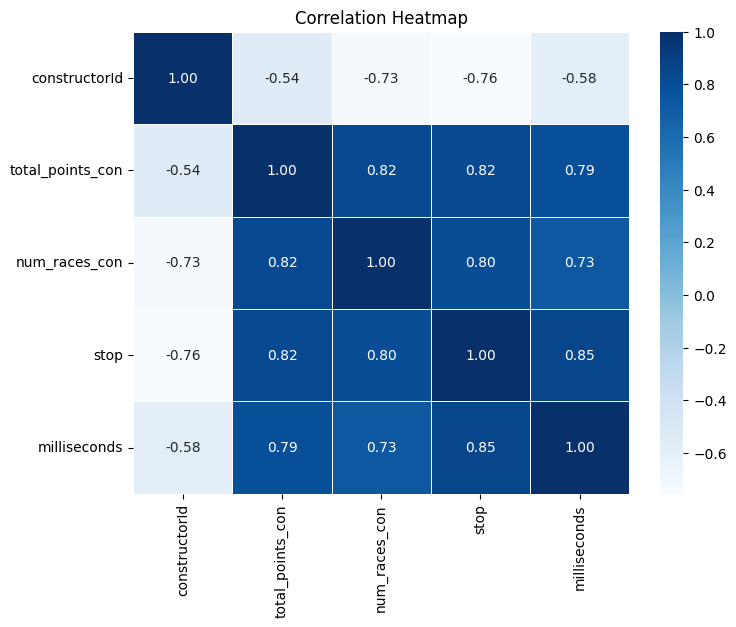

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(pitcon_corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

plt.savefig("pitcon_corr_matrix.png")